gamma = 0.011447517432864497


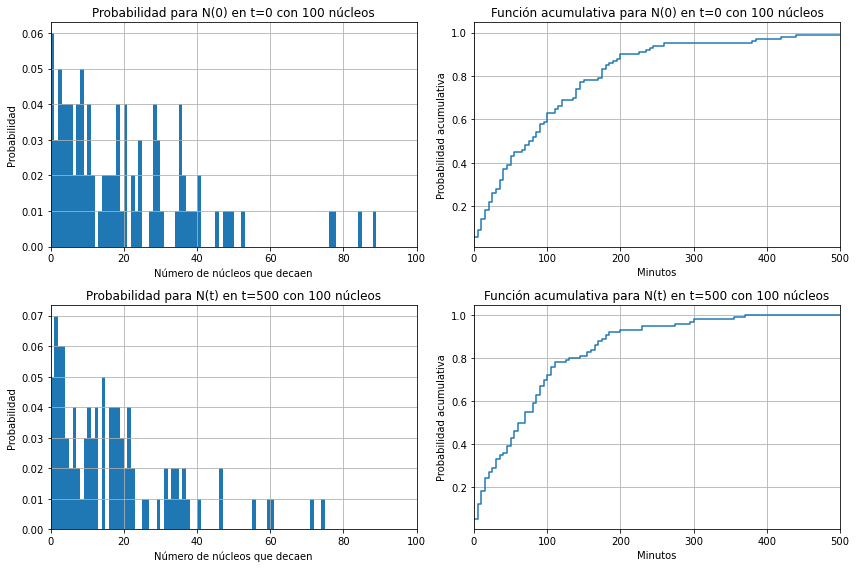

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from scipy import integrate
from numba import njit
from scipy.stats import poisson
tau=60.55/np.log(2)
gamma=1/tau
print(f"gamma = {gamma}")
gamma = 0.011447517432864497
t=np.arange(0,20*tau+1,5)
tmed=((t+np.roll(t, shift=1))/2)[1:]

def P(t):
    return gamma*np.exp(-gamma*t)

pdf=np.array([integrate.quad(P,i,i+5)[0] for i in t[:-1]]) #integramos en el dt para obtener la pdf en el tiempo

cdf=np.cumsum(pdf) 
cdf=np.insert(cdf, 0, 0)#encontramos la cdf
rn.seed(6320)
#Función para simular decaimientos de N núcleos
@njit
def simul(N):
    histograma=np.zeros(N)
    for i in range(N):
        r = rn.random()
        if r <= cdf.max():
            for j in np.arange(1,len(cdf)):
                if r >= cdf[j-1] and r < cdf[j]:             
                    histograma[i]=tmed[j-1]
                    break
        else:
            continue
    no_cero = np.nonzero(histograma)
    histograma=histograma[no_cero] #los valores que quedan 0 son para aquellos nucleos que decaen después de 4 tau
    return histograma       #retorna lista con el minuto en que decayó cada núcleo

N=np.array([1e2,1e3,1e6,1e8])
s1=[]
j=0
for n in N:
    x=simul(int(n))   #simulamos para las diferentes cantidades de núcleos
    dec=np.histogram(x,t)[0]
    dec=np.append(dec,0)
    s1.append(dec)  
    
N_0 = 100  # Número inicial de núcleos
x_0 = simul(N_0)

dec_0 = np.histogram(x_0, t)[0]
dec_0 = np.append(dec_0, 0)

N_t = len(x_0)  # Número de núcleos en el tiempo intermedio (t=500)
x_t = simul(N_t)

dec_t = np.histogram(x_t, t)[0]
dec_t = np.append(dec_t, 0)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0,0].bar(range(len(dec_0)), dec_0 / N_0, width=1, align="edge")
axs[0,0].set_xlabel("Número de núcleos que decaen")
axs[0,0].set_ylabel("Probabilidad")
axs[0,0].set_title(f"Probabilidad para N(0) en t=0 con {N_0} núcleos")
axs[0,0].grid()
axs[0,0].set_xlim(0, 100)

axs[0,1].step(t, np.cumsum(dec_0) / N_0, where="post")
axs[0,1].set_xlabel("Minutos")
axs[0,1].set_ylabel("Probabilidad acumulativa")
axs[0,1].set_title(f"Función acumulativa para N(0) en t=0 con {N_0} núcleos")
axs[0,1].grid()
axs[0,1].set_xlim(0, 500)

axs[1,0].bar(range(len(dec_t)), dec_t / N_t, width=1, align="edge")
axs[1,0].set_xlabel("Número de núcleos que decaen")
axs[1,0].set_ylabel("Probabilidad")
axs[1,0].set_title(f"Probabilidad para N(t) en t=500 con {N_t} núcleos")
axs[1,0].grid()
axs[1,0].set_xlim(0, 100)

axs[1,1].step(t, np.cumsum(dec_t) / N_t, where="post")
axs[1,1].set_xlabel("Minutos")
axs[1,1].set_ylabel("Probabilidad acumulativa")
axs[1,1].set_title(f"Función acumulativa para N(t) en t=500 con {N_t} núcleos")
axs[1,1].grid()
axs[1,1].set_xlim(0, 500)

plt.tight_layout()
plt.show()